## New York AirBnb data analysis
- data source - https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
### Context
Since its inception in 2008, Airbnb has revolutionized the way people travel, offering a distinctive and personalized approach to experiencing the world. Over the years, Airbnb has evolved into a globally renowned service that caters to both guests and hosts. Central to the company's operations is the extensive data generated by millions of listings on its platform. This vast pool of data serves as a vital resource for Airbnb, enabling them to undertake various critical functions. These include enhancing security measures, making informed business decisions, gaining insights into customer and host behavior and performance, shaping marketing strategies, introducing innovative supplementary services, and much more. In essence, Airbnb's success and continued growth are intrinsically linked to the robust analysis of this wealth of data.
### Data Source
This dataset contains around 49000 observations. Each observation contains of 16 columns which contain both categorical and numerical values. 
### Acquaring and Loading Data
Demonstrating the Code and Techniques for Data Acquisition, Loading, and Analysis
In this section, we will walk through the process of obtaining the necessary data, loading it into a suitable format for analysis, and providing a detailed explanation of the entire procedure along with the resulting insights.

In [44]:
#importing necessary libraries for future analysis
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline

from matplotlib import pyplot as plt


In [3]:
# using pandas library built in 'read_csv' function to read csv file with data
df=pd.read_csv(r'C:\Users\xtaym\Desktop\AB_NYC_2019.csv')
# examining first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# checking the number of records in dataset
len(df)

48895

In [5]:
# checking datatypes
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# checking count of missing values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Once we've successfully loaded the AB_2019_NYC dataset and taken a glance at its initial rows, we immediately observe the dataset's richness, consisting of 16 columns that hold a wealth of information. However, it's worth noting that there are some apparent missing values that will necessitate thorough cleaning and treatment of NaN (Not-a-Number) values. As we proceed, we may also find it essential to encode specific values into binary representations (ones and zeros) to facilitate predictive analytics. This dataset promises an exciting journey of in-depth data exploration and analysis.

### Understanding and cleaning the data
We can see that 'name' and 'host_name' are missing only for a few observations. A significant amount of Na's is related to reviews, we will check if it is because the properties do not yet have a review to their name.

In [7]:
(df['number_of_reviews']==0).sum()

10052

As we can see we have exactly the same amount of observations with 0 reviews as review related NA's in our data set. Based on this information i will replace NA's with 0 in reviews_per_month and drop last_review column assuming that they do not have any reviews to their name.

In [8]:
# dropping the column
df.drop(['last_review'],axis=1,inplace=True)
# replacing NA's with 0
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
# examine changes
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Now we will examine some segments by which the data could be group eg. neigourhood_group

In [19]:
print(df['neighbourhood_group'].unique(),
df['room_type'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] ['Private room' 'Entire home/apt' 'Shared room']


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


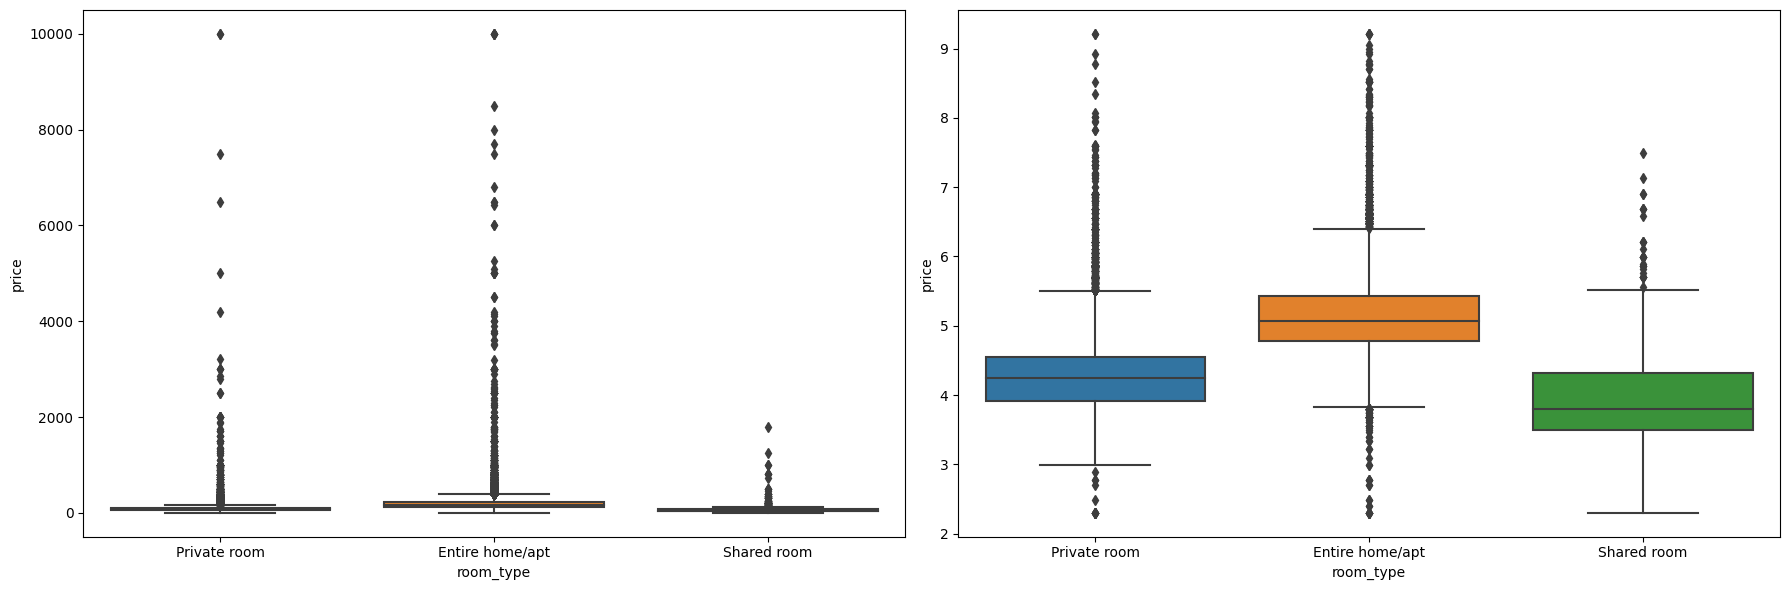

In [38]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [18.00, 6.0]
sns.boxplot(y=df['price'],x=df['room_type'],ax=axes[0])
sns.boxplot(y=np.log(df['price']),x=df['room_type'],ax=axes[1])
plt.rcParams["figure.autolayout"] = True
plt.show()

Across every category there is a lot of outliers. To combat this we transformed the prices into logarythm. After this transformation we can see that Shared rooms are the cheapest followed by Private rooms while entire places tend to be most expensive. It can also be related to neighbourhood. However out thansformation didnt help with lots of outliers across all categories, we will create another plot excluding places with price bigger than 500 USD.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

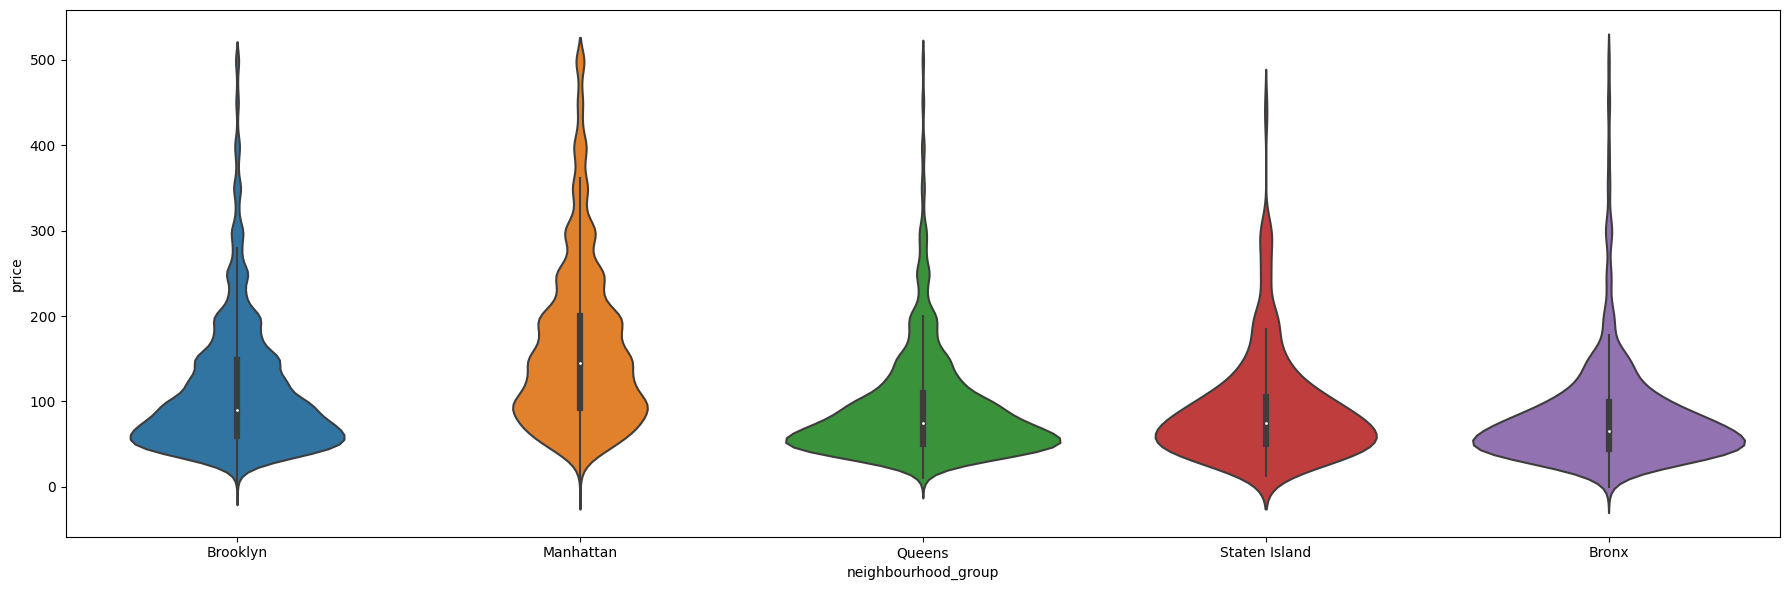

In [41]:
df_sub500=df[df['price']<=500]
sns.violinplot(data=df_sub500,y='price',x='neighbourhood_group')

We can see that Manhattan is the most expensive, followed by Brooklyn. The rest of the areas are quite similar when it comes to AirBnB prices.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

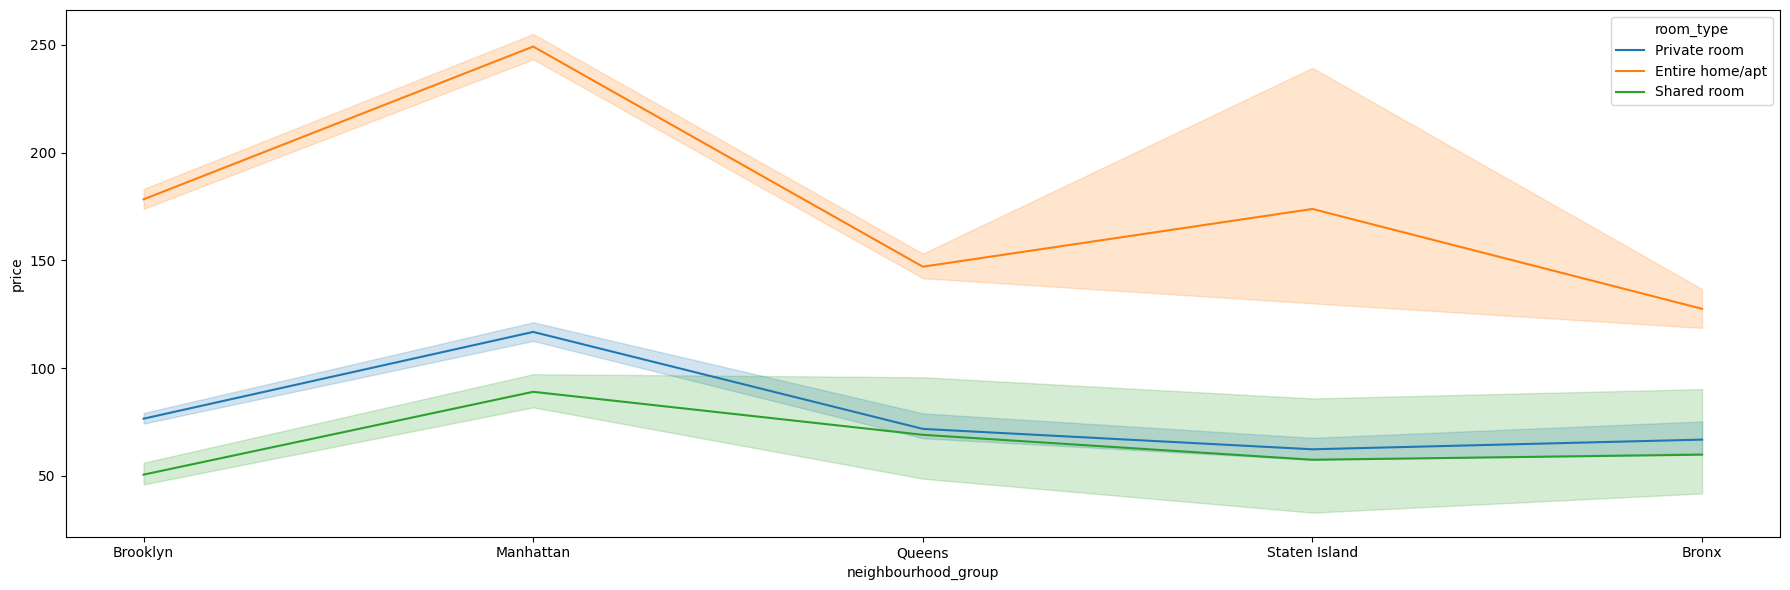

In [39]:
sns.lineplot(data=df,x='neighbourhood_group',y='price',hue='room_type')

Manhattan is the most expensive neighbourhood across all categories. Entire places tend to be more expensive across the whole city. We can observe huge variation in values for entire places at staten island it could be related to size of the district and proximity to the city center.

10000

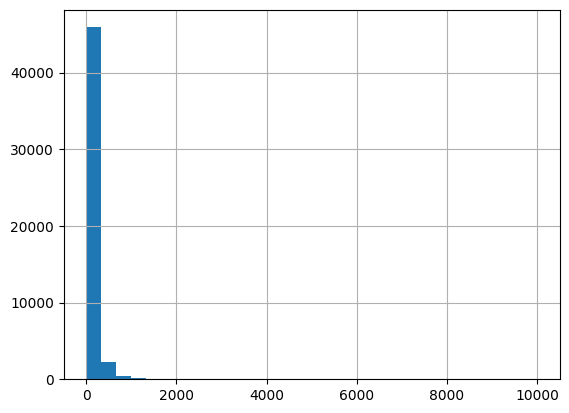

In [10]:
df['price'].hist(bins=30)
df['price'].max()

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


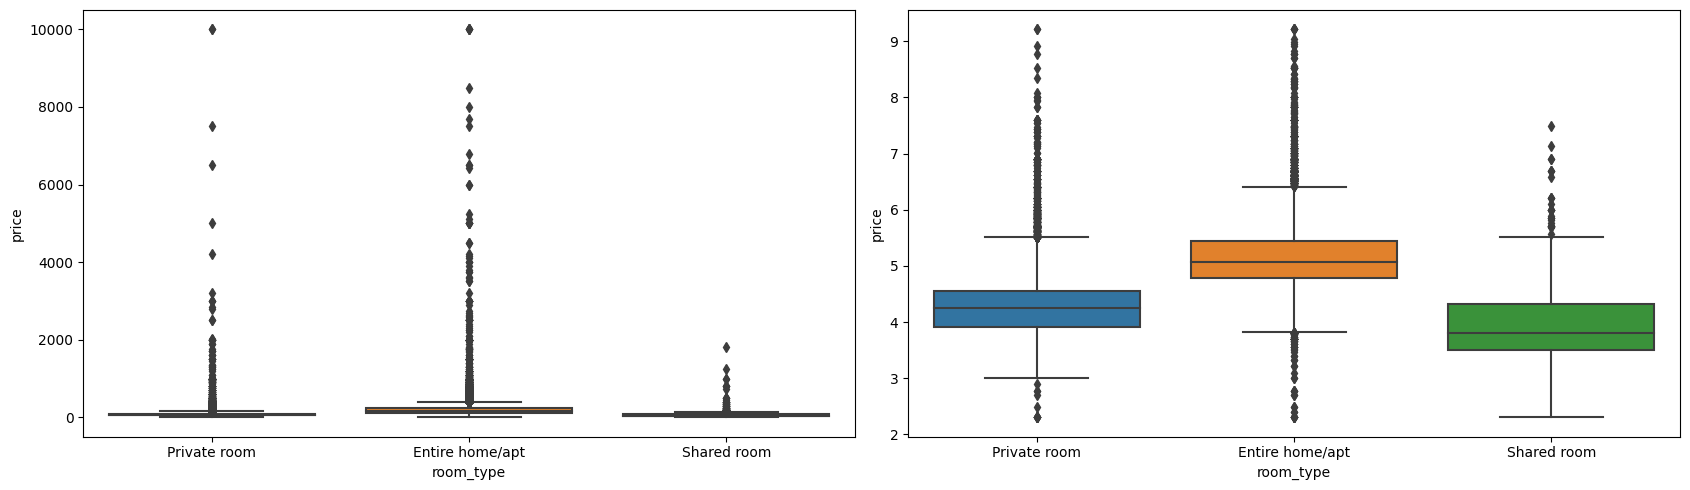

In [39]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [12.00, 5.0]
sns.boxplot(y=df['price'],x=df['room_type'],ax=axes[0])
sns.boxplot(y=np.log(df['price']),x=df['room_type'],ax=axes[1])
plt.rcParams["figure.autolayout"] = True
plt.show()